In [1]:
import torch
from repop import dataset,params2theta,theta2params
from matplotlib import pyplot as plt
import pandas as pd

import numpy as np
np.random.seed(42)

In [2]:
threshold = 300
df = pd.read_csv('real_data/Exp_1_Ecoli_population.csv')
df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(0)

dil_schedule = np.array((20,200,2000))/.9

/tmp/ipykernel_16640/804262058.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
/tmp/ipykernel_16640/804262058.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(0)


In [3]:
def get_counts(df,day):
    ks = df.to_numpy()[df['Day']==day,1:3]

    cts,dils =[],[]
    for k_line in ks:
        index = np.argmax(k_line <= threshold) if np.any(ks <= threshold) else len(ks) - 1
        cts.append( k_line[index] )
        dils.append( dil_schedule[index] )

    cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)
    keep = np.logical_and(cts<=300,  cts>=0)

    return cts[keep],dils[keep]

In [4]:
days = (3,5,7,9)

data_day =[]
for day in days:
    cts,dils = get_counts(df,day)
    data_day.append(dataset(cts,dils))
    (data_day[-1]).evaluate(observe=False)

/tmp/ipykernel_16640/1640360546.py:10: RuntimeWarning: invalid value encountered in cast
  cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)
/tmp/ipykernel_16640/1640360546.py:10: RuntimeWarning: invalid value encountered in cast
  cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)


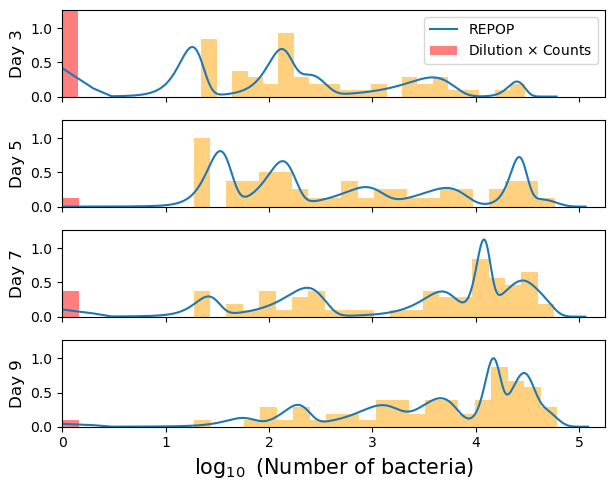

In [5]:
fig,ax = plt.subplots(4,figsize=(6.25,5),sharex='col')
data_day[0].log_plots(ax[0]) 
[dt.log_plots(axi) for (dt,axi) in zip(data_day[1:],ax[1:])]


ym = max([axi.get_ylim()[-1] for axi in ax])
[(axi.set_xlim(0,5.25),axi.set_ylim(0,ym*1.02)) for axi in ax] 
[axi.set_ylabel('Day {}'.format(i),fontsize=12) for (axi,i) in zip(ax,(3,5,7,9))]
[axi.set_xlabel('') for axi in ax[:-1]]
ax[0].legend()

plt.tight_layout()
plt.savefig('graphs/worms.png',dpi=500)